# 1. **Importación de librerías y carga de datos**

In [2]:
# Importación de librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('../')
from src import sp_analisis as sa

# Configuración para mostrar todas las columnas.
pd.set_option('display.max_columns', None)

Para este proyecto, nos han proporcionado dos datasets. Abriremos los dos datasets y los combinaremos en uno solo (previa comprobacion de que no existen duplicados) para realizar un análisis más completo.

In [ ]:
df1 = sa.abrir_archivo(r"\bank-additional.csv")
df2 = sa.abrir_archivo(r"\customer-details.xlsx")
df_merged = sa.combinar(df1,df2)
df_merged.sample(5).T

,453,37309,26198,26158,22941
age,NaN,45.0,32.0,31.0,46.0
job,admin.,admin.,technician,admin.,admin.
marital,SINGLE,DIVORCED,MARRIED,SINGLE,MARRIED
education,university.degree,university.degree,professional.course,university.degree,university.degree
default,NaN,0.0,0.0,0.0,NaN
housing,NaN,1.0,1.0,0.0,0.0
loan,NaN,0.0,0.0,0.0,0.0
contact,telephone,cellular,cellular,cellular,cellular
duration,49,150,370,166,55
campaign,1,3,1,1,2


# 2. **Preanálisis**

Vamos a obtener las dimensiones y la información más relevante de nuestro dataset.

In [4]:
# Llevamos a cabo el preanálisis inicial llamando a la función 'preanalisis'.
sa.preanalisis(df_merged)

El dataframe tiene 43000 filas y 28 columnas
--------------------------------------------------
Tenemos un total de 0 valores duplicados
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  float64       
 5   housing            41974 non-null  float64       
 6   loan               41974 non-null  float64       
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int

None

--------------------------------------------------
Los nulos por columna se distribuyen de la siguiente forma:


,Valores_nulos,Porcentaje_nulos
age,5120,11.91
job,345,0.80
marital,85,0.20
education,1807,4.20
default,8981,20.89
housing,1026,2.39
loan,1026,2.39
cons.price.idx,471,1.10
euribor3m,9256,21.53
date,248,0.58


--------------------------------------------------
Los estadísticos descriptivos de las variables numéricas son:


,count,mean,min,25%,50%,75%,max,std
age,37880.0,39.977112,17.0,32.0,38.0,47.0,98.0,10.437957
default,34019.0,0.000088,0.0,0.0,0.0,0.0,1.0,0.00939
housing,41974.0,0.535998,0.0,0.0,1.0,1.0,1.0,0.498708
loan,41974.0,0.15562,0.0,0.0,0.0,0.0,1.0,0.362499
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
pdays,43000.0,962.330953,0.0,999.0,999.0,999.0,999.0,187.260394
previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
emp.var.rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
latitude,43000.0,36.856697,24.396,30.61475,36.761,43.11325,49.384,7.225948


--------------------------------------------------
Los estadísticos descriptivos de las variables categóricas son:


,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
cons.price.idx,42529,26,"93,994",7938
cons.conf.idx,43000,26,"-36,4",8020
euribor3m,33744,309,"4,857",2287
nr.employed,43000,11,"5228,1",16980
y,43000,2,no,38156


--------------------------------------------------
La distribución de frecuencias de las variables categóricas es:

Para la columna JOB, los valores únicos son:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']


,Frecuencia,Porcentaje
job,,
admin.,10873,25.29
blue-collar,9654,22.45
technician,7026,16.34
services,4162,9.68
management,3050,7.09
retired,1790,4.16
entrepreneur,1522,3.54
self-employed,1489,3.46
housemaid,1123,2.61


--------------------------------------------------
Para la columna MARITAL, los valores únicos son:
['MARRIED' 'SINGLE' 'DIVORCED' nan]


,Frecuencia,Porcentaje
marital,,
MARRIED,25999,60.46
SINGLE,12105,28.15
DIVORCED,4811,11.19


--------------------------------------------------
Para la columna EDUCATION, los valores únicos son:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']


,Frecuencia,Porcentaje
education,,
university.degree,12722,29.59
high.school,9925,23.08
basic.9y,6309,14.67
professional.course,5477,12.74
basic.4y,4356,10.13
basic.6y,2386,5.55
illiterate,18,0.04


--------------------------------------------------
Para la columna CONTACT, los valores únicos son:
['telephone' 'cellular']


,Frecuencia,Porcentaje
contact,,
cellular,27396,63.71
telephone,15604,36.29


--------------------------------------------------
Para la columna POUTCOME, los valores únicos son:
['NONEXISTENT' 'FAILURE' 'SUCCESS']


,Frecuencia,Porcentaje
poutcome,,
NONEXISTENT,37103,86.29
FAILURE,4461,10.37
SUCCESS,1436,3.34


--------------------------------------------------
Para la columna CONS.PRICE.IDX, los valores únicos son:
['93,994' nan '94,465' '93,918' '93,444' '93,798' '93,2' '92,756' '92,843'
 '93,075' '92,893' '92,963' '92,469' '92,201' '92,379' '92,431' '92,649'
 '92,713' '93,369' '93,749' '93,876' '94,055' '94,215' '94,027' '94,199'
 '94,601' '94,767']


,Frecuencia,Porcentaje
cons.price.idx,,
"93,994",7938,18.46
"93,918",6937,16.13
"92,893",5985,13.92
"93,444",5349,12.44
"94,465",4522,10.52
"93,2",3731,8.68
"93,075",2552,5.93
"92,201",803,1.87
"92,963",742,1.73


--------------------------------------------------
Para la columna CONS.CONF.IDX, los valores únicos son:
['-36,4' '-41,8' '-42,7' '-36,1' '-40,4' '-42' '-45,9' '-50' '-47,1'
 '-46,2' '-40,8' '-33,6' '-31,4' '-29,8' '-26,9' '-30,1' '-33' '-34,8'
 '-34,6' '-40' '-39,8' '-40,3' '-38,3' '-37,5' '-49,5' '-50,8']


,Frecuencia,Porcentaje
cons.conf.idx,,
"-36,4",8020,18.65
"-42,7",7004,16.29
"-46,2",6057,14.09
"-36,1",5408,12.58
"-41,8",4568,10.62
-42,3782,8.80
"-47,1",2581,6.00
"-31,4",815,1.90
"-40,8",748,1.74


--------------------------------------------------
Para la columna EURIBOR3M, los valores únicos son:
['4,857' nan '4,856' '4,855' '4,859' '4,86' '4,858' '4,864' '4,865'
 '4,866' '4,967' '4,961' '4,959' '4,958' '4,96' '4,962' '4,955' '4,947'
 '4,956' '4,966' '4,963' '4,957' '4,968' '4,97' '4,965' '4,964' '5,045'
 '4,936' '4,921' '4,918' '4,912' '4,827' '4,794' '4,76' '4,733' '4,7'
 '4,663' '4,592' '4,474' '4,406' '4,343' '4,286' '4,245' '4,223' '4,191'
 '4,153' '4,12' '4,076' '4,021' '3,901' '3,879' '3,853' '3,743' '3,563'
 '3,488' '3,428' '3,329' '3,282' '3,053' '1,811' '1,799' '1,778' '1,757'
 '1,726' '1,703' '1,687' '1,663' '1,65' '1,64' '1,629' '1,614' '1,602'
 '1,584' '1,56' '1,556' '1,548' '1,538' '1,531' '1,52' '1,51' '1,498'
 '1,483' '1,479' '1,466' '1,453' '1,445' '1,435' '1,423' '1,415' '1,41'
 '1,405' '1,406' '1,4' '1,392' '1,384' '1,372' '1,365' '1,354' '1,344'
 '1,334' '1,327' '1,313' '1,299' '1,291' '1,281' '1,266' '1,25' '1,244'
 '1,259' '1,264' '1,27' '1,262' '1,26' '1,

,Frecuencia,Porcentaje
euribor3m,,
"4,857",2287,5.32
"4,962",2124,4.94
"4,963",2019,4.70
"4,961",1594,3.71
"4,964",964,2.24
...,...,...
"5,045",1,0.00
"4,921",1,0.00
"0,895",1,0.00


--------------------------------------------------
Para la columna NR.EMPLOYED, los valores únicos son:
['5191' '5228,1' '5195,8' '5176,3' '5099,1' '5076,2' '5017,5' '5023,5'
 '5008,7' '4991,6' '4963,6']


,Frecuencia,Porcentaje
nr.employed,,
"5228,1",16980,39.49
"5099,1",8937,20.78
5191,8020,18.65
"5195,8",3830,8.91
"5076,2",1748,4.07
"5017,5",1133,2.63
"4991,6",812,1.89
"5008,7",683,1.59
"4963,6",665,1.55


--------------------------------------------------
Para la columna Y, los valores únicos son:
['no' 'yes']


,Frecuencia,Porcentaje
y,,
no,38156,88.73
yes,4844,11.27


--------------------------------------------------
Para la columna DATE, los valores únicos son:
['2-agosto-2019' '14-septiembre-2016' '15-febrero-2019' ... '28-mayo-2016'
 '22-abril-2015' '7-marzo-2015']


,Frecuencia,Porcentaje
date,,
28-febrero-2018,95,0.22
28-febrero-2016,94,0.22
28-febrero-2015,92,0.21
28-febrero-2017,89,0.21
28-febrero-2019,85,0.20
...,...,...
17-diciembre-2018,11,0.03
21-diciembre-2019,10,0.02
14-abril-2015,10,0.02


--------------------------------------------------
Para la columna ID, los valores únicos son:
['089b39d8-e4d0-461b-87d4-814d71e0e079'
 'e9d37224-cb6f-4942-98d7-46672963d097'
 '3f9f49b5-e410-4948-bf6e-f9244f04918b' ...
 'cadadd4b-7ee5-4019-b13a-ca01bb67ca5b'
 '5f432048-d515-4bb5-9c94-62db451f88d4'
 '993bbbd6-4dbc-4a40-a408-f91f8462bee6']


,Frecuencia,Porcentaje
id,,
993bbbd6-4dbc-4a40-a408-f91f8462bee6,1,0.0
089b39d8-e4d0-461b-87d4-814d71e0e079,1,0.0
e9d37224-cb6f-4942-98d7-46672963d097,1,0.0
3f9f49b5-e410-4948-bf6e-f9244f04918b,1,0.0
9991fafb-4447-451a-8be2-b0df6098d13e,1,0.0
...,...,...
66a752e2-b2f1-440c-9a8f-cc3b10d74dd0,1,0.0
ca5c0d7a-8bbd-42b3-8351-1074c5be011a,1,0.0
8d700df5-0c33-4517-8cf8-92e1c92c9c12,1,0.0


--------------------------------------------------


# 3. **Limpieza inicial**

A la vista del preanálisis, estos son los cambios iniciales a realizar:

1. Tipos a cambiar:

    - **default**: float -> object
    - **housing**: float -> object
    - **loan**: -> float -> object
    - **cons.price.idx**: object -> float
    - **cons.conf.idx**: object -> float
    - **euribor3m**: object -> float
    - **date**: object -> datetime

2. Categorías a cambiar

    - **job**: admin. -> admin
    - **marital**: está en MAYUS, (poner todos los valores en minúsculas)
    - **education**: reemplazar en los valores el '.' por ' ' (espacio) y agrupar todas las que empiezan por 'basic'
    - **poutcome**: está en MAYUS, (poner todos los valores en minúsculas) y reemplazar el valor 'nonexistent' por 'unknown'

3. Columnas con nulos:

    - **age**: 5120 valores nulos
    - **job**: 345 valores nulos
    - **marital**: 85 valores nulos
    - **education**: 1807 valores nulos
    - **default**: 8981 valores nulos
    - ***housing***: 1026 valores nulos
    - **loan**: 1026 valores nulos
    - **cons.price.idx**: 471 valores nulos
    - **euribor3m**: 9256 valores nulos
    - **date**: 248 valores nulos
    - **income**: 22982 valores nulos
    - **kidhome**: 22982 valores nulos
    - **Teenhome**: 22982 valores nulos
    - **Dt_Customer**: 22982 valores nulos
    - **NumWebVisitsMonth**: 22982 valores nulos

4. Columnas a eliminar:

    - **Latitude** y **Longitude**: no aparecen en el diccionario de datos proporcionado por cliente por lo que decidimos eliminarlas del análisis.
    - **Nr_employed**: a priori, el número de empleados de la sucursal no es un dato que parezca significativo para evaluar si el producto es suscrito o no por los clientes, por lo que decidimos eliminarla del análisis.
    - **Date**: tras cambiarla a tipo datetime, añadimos tres columnas ('Year', 'Month', 'Day') para futuros análisis y, posteriormente la eliminamos.

Vamos a llevar a cabo una limpieza inicial que engloba a los anteriores puntos 1, 2 y 4. Posteriormente, gestionaremos los nulos (punto 3).

In [5]:
# Llevamos a cabo la limpieza inicial guardando en un diccionario las columnas a modificar y llamando a la función 'limpieza_inicial'.
dict_columnas = {'columns_to_drop' : ['Latitude', 'Longitude','Nr_Employed'],
                 'columns_to_float' : ['Cons_Price_Idx', 'Cons_Conf_Idx', 'Euribor3M'],
                 'float_obj' : ['Default', 'Housing', 'Loan'],
                 'reemplazar_agrupar' : 'Education',
                 'float_int' : ['Age','Income','Kidhome','Teenhome','Numwebvisitsmonth'],
                 'quitar_puntos' : 'Job',
                 'reemplazar_nonexistent' : ['Poutcome']
}
df_merged = sa.limpieza_inicial(df_merged,dict_columnas)
df_merged.sample(5).T 

,27800,35426,16751,15289,8645
Age,32,58,54,36,51
Job,admin,blue-collar,technician,admin,admin
Marital,single,married,married,married,married
Education,university_degree,high_school,university_degree,professional_course,high_school
Default,no,NaN,no,no,no
Housing,NaN,no,yes,no,no
Loan,NaN,no,no,no,yes
Contact,cellular,cellular,cellular,cellular,telephone
Duration,77,176,185,262,222
Campaign,3,1,6,1,1


In [6]:
# Comprobamos que los cambios de tipo de datos de las columnas seleccionadas son correctos.
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                37880 non-null  Int64         
 1   Job                42655 non-null  object        
 2   Marital            42915 non-null  object        
 3   Education          41193 non-null  object        
 4   Default            34019 non-null  object        
 5   Housing            41974 non-null  object        
 6   Loan               41974 non-null  object        
 7   Contact            43000 non-null  object        
 8   Duration           43000 non-null  int64         
 9   Campaign           43000 non-null  int64         
 10  Pdays              43000 non-null  int64         
 11  Previous           43000 non-null  int64         
 12  Poutcome           5897 non-null   object        
 13  Emp_Var_Rate       43000 non-null  float64       
 14  Cons_P

Ahora que ya tenemos todas las columnas con el tipo de dato correcto, vamos a comprobar la correlación entre las variables numéricas mediante una matriz de correlación que incluya la columna 'Y' (cambiándola a numérica).

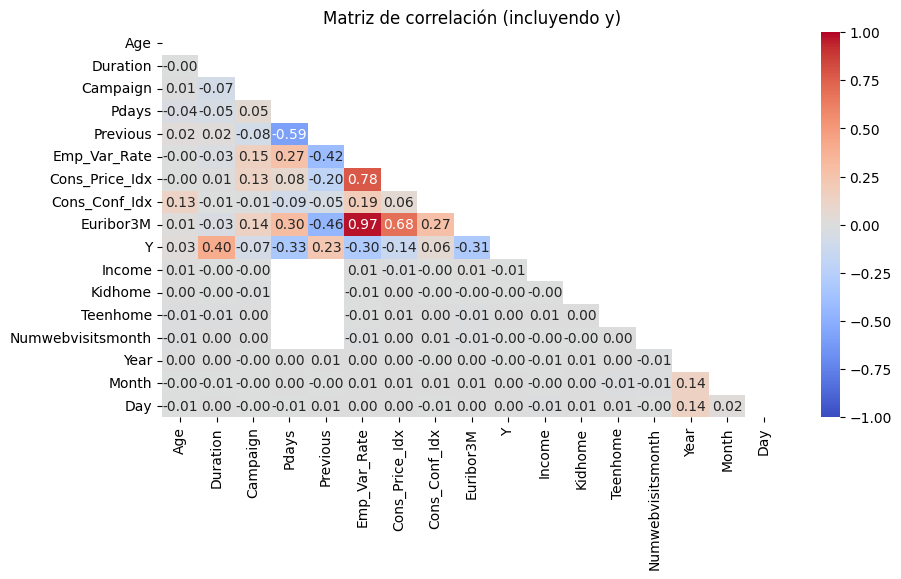

In [7]:
sa.matriz_corr(df_merged)

Las columnas 'Income', 'Kidhome', 'Teenhome', 'Numwebvisitsmonth' del segundo dataset no tienen correlación con el resultado de la campaña y, además, tienen un porcentaje de valores nulos del 53,45 %. Decidimos eliminarlas junto con la columna 'Dt_Customer', también del segundo dataset.

In [8]:
columns_to_drop = ['Income', 'Kidhome', 'Teenhome', 'Numwebvisitsmonth', 'Dt_Customer']
sa.eliminar_columnas(df_merged,columns_to_drop)

# 4. **Gestión de nulos**

Vamos a ver cómo se distribuyen los nulos y las frecuencias de los valores de todas las variables, llamando a la función 'calcular_nulos'.

In [9]:
sa.analisis_nulos_frecuencias(df_merged)

Los nulos por columna se distribuyen de la siguiente forma:


,Valores_nulos,Porcentaje_nulos
Age,5120,11.91
Job,345,0.80
Marital,85,0.20
Education,1807,4.20
Default,8981,20.89
Housing,1026,2.39
Loan,1026,2.39
Poutcome,37103,86.29
Cons_Price_Idx,471,1.10
Euribor3M,9256,21.53


--------------------------------------------------
🔠 COLUMNAS CATEGÓRICAS
La distribución de frecuencias de las variables categóricas es:

En la columna JOB los valores nulos son:
0.8%

Para la columna JOB, los valores únicos son:
['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']


,Frecuencia,Porcentaje
Job,,
admin,10873,25.29
blue-collar,9654,22.45
technician,7026,16.34
services,4162,9.68
management,3050,7.09
retired,1790,4.16
entrepreneur,1522,3.54
self-employed,1489,3.46
housemaid,1123,2.61


--------------------------------------------------
En la columna MARITAL los valores nulos son:
0.2%

Para la columna MARITAL, los valores únicos son:
['married' 'single' 'divorced' nan]


,Frecuencia,Porcentaje
Marital,,
married,25999,60.46
single,12105,28.15
divorced,4811,11.19


--------------------------------------------------
En la columna EDUCATION los valores nulos son:
4.2%

Para la columna EDUCATION, los valores únicos son:
['basic' 'high_school' 'professional_course' nan 'university_degree'
 'illiterate']


,Frecuencia,Porcentaje
Education,,
basic,13051,30.35
university_degree,12722,29.59
high_school,9925,23.08
professional_course,5477,12.74
illiterate,18,0.04


--------------------------------------------------
En la columna DEFAULT los valores nulos son:
20.89%

Para la columna DEFAULT, los valores únicos son:
['no' nan 'yes']


,Frecuencia,Porcentaje
Default,,
no,34016,79.11
yes,3,0.01


--------------------------------------------------
En la columna HOUSING los valores nulos son:
2.39%

Para la columna HOUSING, los valores únicos son:
['no' 'yes' nan]


,Frecuencia,Porcentaje
Housing,,
yes,22498,52.32
no,19476,45.29


--------------------------------------------------
En la columna LOAN los valores nulos son:
2.39%

Para la columna LOAN, los valores únicos son:
['no' 'yes' nan]


,Frecuencia,Porcentaje
Loan,,
no,35442,82.42
yes,6532,15.19


--------------------------------------------------
En la columna CONTACT los valores nulos son:
0.0%

Para la columna CONTACT, los valores únicos son:
['telephone' 'cellular']


,Frecuencia,Porcentaje
Contact,,
cellular,27396,63.71
telephone,15604,36.29


--------------------------------------------------
En la columna POUTCOME los valores nulos son:
86.29%

Para la columna POUTCOME, los valores únicos son:
[nan 'failure' 'success']


,Frecuencia,Porcentaje
Poutcome,,
failure,4461,10.37
success,1436,3.34


--------------------------------------------------
En la columna Y los valores nulos son:
0.0%

Para la columna Y, los valores únicos son:
['no' 'yes']


,Frecuencia,Porcentaje
Y,,
no,38156,88.73
yes,4844,11.27


--------------------------------------------------
En la columna ID los valores nulos son:
0.0%

Para la columna ID, los valores únicos son:
['089b39d8-e4d0-461b-87d4-814d71e0e079'
 'e9d37224-cb6f-4942-98d7-46672963d097'
 '3f9f49b5-e410-4948-bf6e-f9244f04918b' ...
 'cadadd4b-7ee5-4019-b13a-ca01bb67ca5b'
 '5f432048-d515-4bb5-9c94-62db451f88d4'
 '993bbbd6-4dbc-4a40-a408-f91f8462bee6']


,Frecuencia,Porcentaje
Id,,
993bbbd6-4dbc-4a40-a408-f91f8462bee6,1,0.0
089b39d8-e4d0-461b-87d4-814d71e0e079,1,0.0
e9d37224-cb6f-4942-98d7-46672963d097,1,0.0
3f9f49b5-e410-4948-bf6e-f9244f04918b,1,0.0
9991fafb-4447-451a-8be2-b0df6098d13e,1,0.0
...,...,...
66a752e2-b2f1-440c-9a8f-cc3b10d74dd0,1,0.0
ca5c0d7a-8bbd-42b3-8351-1074c5be011a,1,0.0
8d700df5-0c33-4517-8cf8-92e1c92c9c12,1,0.0


--------------------------------------------------
🔢 COLUMNAS NUMÉRICAS
En la columna AGE los valores nulos son:
11.91%



,Frecuencia,Porcentaje
Age,,
31,1810,4.21
33,1704,3.96
32,1672,3.89
36,1649,3.83
34,1608,3.74
...,...,...
91,2,0.0
98,2,0.0
95,1,0.0


--------------------------------------------------
En la columna DURATION los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Duration,,
90,183,0.43
136,177,0.41
85,177,0.41
73,172,0.40
111,170,0.40
...,...,...
1416,1,0.00
1603,1,0.00
1361,1,0.00


--------------------------------------------------
En la columna CAMPAIGN los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Campaign,,
1,18404,42.80
2,11048,25.69
3,5584,12.99
4,2777,6.46
5,1658,3.86
6,1025,2.38
7,658,1.53
8,418,0.97
9,289,0.67


--------------------------------------------------
En la columna PDAYS los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Pdays,,
999,41412,96.31
3,457,1.06
6,428,1.00
4,121,0.28
9,67,0.16
7,66,0.15
2,63,0.15
12,61,0.14
10,55,0.13


--------------------------------------------------
En la columna PREVIOUS los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Previous,,
0,37103,86.29
1,4778,11.11
2,786,1.83
3,232,0.54
4,75,0.17
5,20,0.05
6,5,0.01
7,1,0.00


--------------------------------------------------
En la columna EMP_VAR_RATE los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Emp_Var_Rate,,
1.4,16980,39.49
-1.8,9620,22.37
1.1,8020,18.65
-0.1,3830,8.91
-2.9,1748,4.07
-3.4,1133,2.63
-1.7,812,1.89
-1.1,665,1.55
-3.0,181,0.42


--------------------------------------------------
En la columna CONS_PRICE_IDX los valores nulos son:
1.1%



,Frecuencia,Porcentaje
Cons_Price_Idx,,
93.994,7938,18.46
93.918,6937,16.13
92.893,5985,13.92
93.444,5349,12.44
94.465,4522,10.52
93.200,3731,8.68
93.075,2552,5.93
92.201,803,1.87
92.963,742,1.73


--------------------------------------------------
En la columna CONS_CONF_IDX los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Cons_Conf_Idx,,
-36.4,8020,18.65
-42.7,7004,16.29
-46.2,6057,14.09
-36.1,5408,12.58
-41.8,4568,10.62
-42.0,3782,8.80
-47.1,2581,6.00
-31.4,815,1.90
-40.8,748,1.74


--------------------------------------------------
En la columna EURIBOR3M los valores nulos son:
21.53%



,Frecuencia,Porcentaje
Euribor3M,,
4.857,2287,5.32
4.962,2124,4.94
4.963,2019,4.70
4.961,1594,3.71
4.964,964,2.24
...,...,...
5.045,1,0.00
4.921,1,0.00
0.895,1,0.00


--------------------------------------------------
En la columna YEAR los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Year,,
2019,8564,19.92
2017,8562,19.91
2018,8549,19.88
2015,8544,19.87
2016,8533,19.84
0,248,0.58


--------------------------------------------------
En la columna MONTH los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Month,,
11,3603,8.38
10,3599,8.37
7,3593,8.36
3,3589,8.35
4,3582,8.33
2,3577,8.32
9,3569,8.30
5,3547,8.25
6,3538,8.23


--------------------------------------------------
En la columna DAY los valores nulos son:
0.0%



,Frecuencia,Porcentaje
Day,,
28,1755,4.08
30,1688,3.93
27,1469,3.42
14,1436,3.34
16,1436,3.34
23,1431,3.33
2,1424,3.31
25,1407,3.27
22,1405,3.27


--------------------------------------------------


La columna **Poutcome** (resultado de la campaña de marketing anterior) tiene un 86.29% de valores nulos. Esta columna no aporta demasiada información por lo que decidimos eliminarla.

In [10]:
sa.eliminar_columnas(df_merged,'Poutcome')

## 4.1 **Columnas categóricas**

Gestión de nulos para columnas categóricas: 
- Columnas: **'Job', 'Education', 'Default', 'Housing'**
    - Rellenamos con **'unknown'** ya que, si cambiáramos por la moda, habría cambios significativos en las frecuencias de los valores.
- Columnas **'Marital' y 'Loan':**
    - Rellenamos con la **moda** ya que los % son muy bajos y no hay cambios significativos en la frecuencias de los valores

In [11]:
dict_cols_cat = {'col_cat_unknown' : ['Job', 'Education', 'Default', 'Housing'],
                 'col_cat_moda' : ['Marital','Loan']}
sa.rellenar_nulos_cat(df_merged,dict_cols_cat)

## 4.2 Columnas numéricas

Para las columnas numéricas, primero habrá que comprobar la existencia o no de **outliers**, para decidir cómo gestionar los valores nulos. Para ello, representamos mediante **Boxplots** estas columnas.

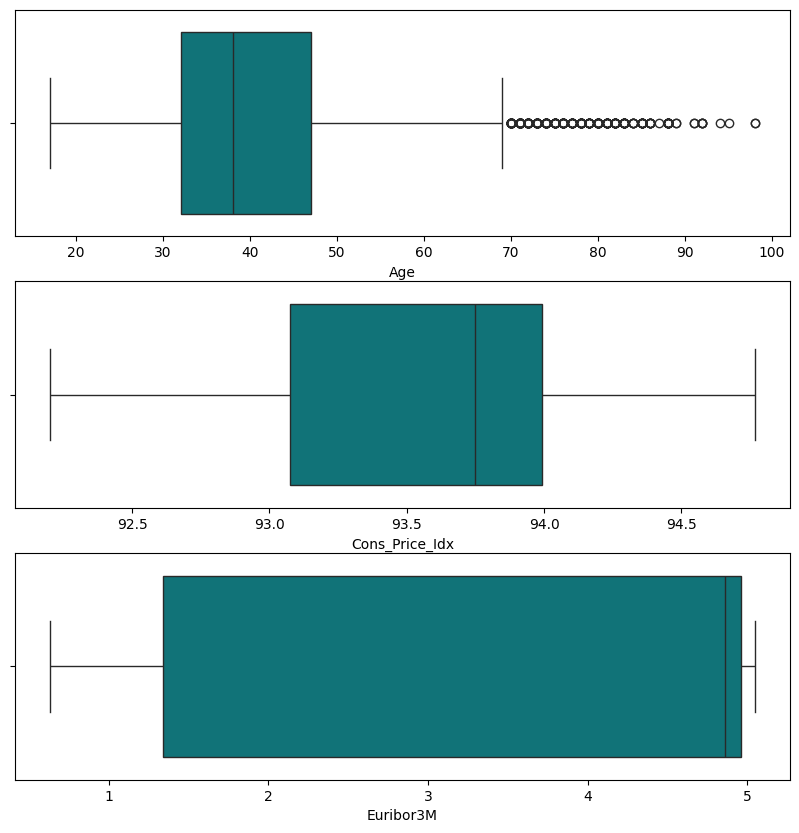

In [12]:
sa.outliers_num(df_merged)

- En la columna 'Age' hay outliers y deberíamos aplicar métodos estadísticos avanzados para gestionar los nulos. En este caso, no lo vamos a hacer ya que las edades consideradas como outliers pueden ser interesantes para posteriores análisis. Así pues, sustituiremos los valores nulos por la mediana, ya que es más robusta frente a outliers.

- En las columnas 'Cons_Price_Idx' y 'Euribor3M' no hay outliers. Sustituiremos los valores nulos por la media o la mediana, dependiendo cuál de ellas tenga menos error.

In [13]:
# Rellenamos los valores nulos de acuerdo al anterior análisis.
dict_cols_num = {'cols_to_mediana' : ['Age'],
                 'cols_to_media_mediana' : ['Cons_Price_Idx', 'Euribor3M']}
sa.rellenar_nulos_num_media_mediana(df_merged,dict_cols_num)

Se han sustituido los nulos de la columna Age por su mediana 38.0.
--------------------------------------------------
Para la columna Cons_Price_Idx, el error es menor con la media.
Los valores nulos se rellenaron con la media: 93.57421926215054
--------------------------------------------------
Para la columna Euribor3M, el error es menor con la media.
Los valores nulos se rellenaron con la media: 3.616520744428639
--------------------------------------------------


Comprobamos para estas tres columnas los valores de la media, la mediana y la desviación estándar, y comprobamos que los valores por los que han sido sustituidos los nulos concuerdan, ejecutando el método describe.

In [14]:
df_merged[['Age','Cons_Price_Idx', 'Euribor3M']].describe().T[['mean', 'std', '50%']]

,mean,std,50%
Age,39.741698,9.817735,38.0
Cons_Price_Idx,93.574219,0.576365,93.574219
Euribor3M,3.616521,1.538834,4.076


Comprobamos que no existen valores nulos en nuestros datos.

In [15]:
sa.analisis_nulos_frecuencias(df_merged)

No hay valores nulos
--------------------------------------------------
🔠 COLUMNAS CATEGÓRICAS
No hay columnas categóricas con valores nulos
--------------------------------------------------
🔢 COLUMNAS NUMÉRICAS
No hay columnas categóricas con valores nulos
--------------------------------------------------


Guardamos el archivo limpio para futuros análisis.

In [16]:
df_merged.to_csv("../data/bank_limpio.csv", index=False)

# 5. Visualizaciones

Ahora que ya tenemos nuestros datos limpios y cada columna con su tipo de dato, vamos a representar:
- Variables categóricas: las frecuencias y sus gráficos de barras
- Variables numéricas: sus histogramas y boxplots

La distribución de frecuencias de las variables categóricas es:

Para la columna JOB, los valores únicos son:
['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


,Frecuencia,Porcentaje
Job,,
admin,10873,25.29
blue-collar,9654,22.45
technician,7026,16.34
services,4162,9.68
management,3050,7.09
retired,1790,4.16
entrepreneur,1522,3.54
self-employed,1489,3.46
housemaid,1123,2.61


--------------------------------------------------
Para la columna MARITAL, los valores únicos son:
['married' 'single' 'divorced']


,Frecuencia,Porcentaje
Marital,,
married,26084,60.66
single,12105,28.15
divorced,4811,11.19


--------------------------------------------------
Para la columna EDUCATION, los valores únicos son:
['basic' 'high_school' 'professional_course' 'unknown' 'university_degree'
 'illiterate']


,Frecuencia,Porcentaje
Education,,
basic,13051,30.35
university_degree,12722,29.59
high_school,9925,23.08
professional_course,5477,12.74
unknown,1807,4.20
illiterate,18,0.04


--------------------------------------------------
Para la columna DEFAULT, los valores únicos son:
['no' 'unknown' 'yes']


,Frecuencia,Porcentaje
Default,,
no,34016,79.11
unknown,8981,20.89
yes,3,0.01


--------------------------------------------------
Para la columna HOUSING, los valores únicos son:
['no' 'yes' 'unknown']


,Frecuencia,Porcentaje
Housing,,
yes,22498,52.32
no,19476,45.29
unknown,1026,2.39


--------------------------------------------------
Para la columna LOAN, los valores únicos son:
['no' 'yes']


,Frecuencia,Porcentaje
Loan,,
no,36468,84.81
yes,6532,15.19


--------------------------------------------------
Para la columna CONTACT, los valores únicos son:
['telephone' 'cellular']


,Frecuencia,Porcentaje
Contact,,
cellular,27396,63.71
telephone,15604,36.29


--------------------------------------------------
Para la columna Y, los valores únicos son:
['no' 'yes']


,Frecuencia,Porcentaje
Y,,
no,38156,88.73
yes,4844,11.27


--------------------------------------------------
Para la columna ID, los valores únicos son:
['089b39d8-e4d0-461b-87d4-814d71e0e079'
 'e9d37224-cb6f-4942-98d7-46672963d097'
 '3f9f49b5-e410-4948-bf6e-f9244f04918b' ...
 'cadadd4b-7ee5-4019-b13a-ca01bb67ca5b'
 '5f432048-d515-4bb5-9c94-62db451f88d4'
 '993bbbd6-4dbc-4a40-a408-f91f8462bee6']


,Frecuencia,Porcentaje
Id,,
993bbbd6-4dbc-4a40-a408-f91f8462bee6,1,0.0
089b39d8-e4d0-461b-87d4-814d71e0e079,1,0.0
e9d37224-cb6f-4942-98d7-46672963d097,1,0.0
3f9f49b5-e410-4948-bf6e-f9244f04918b,1,0.0
9991fafb-4447-451a-8be2-b0df6098d13e,1,0.0
...,...,...
66a752e2-b2f1-440c-9a8f-cc3b10d74dd0,1,0.0
ca5c0d7a-8bbd-42b3-8351-1074c5be011a,1,0.0
8d700df5-0c33-4517-8cf8-92e1c92c9c12,1,0.0


--------------------------------------------------


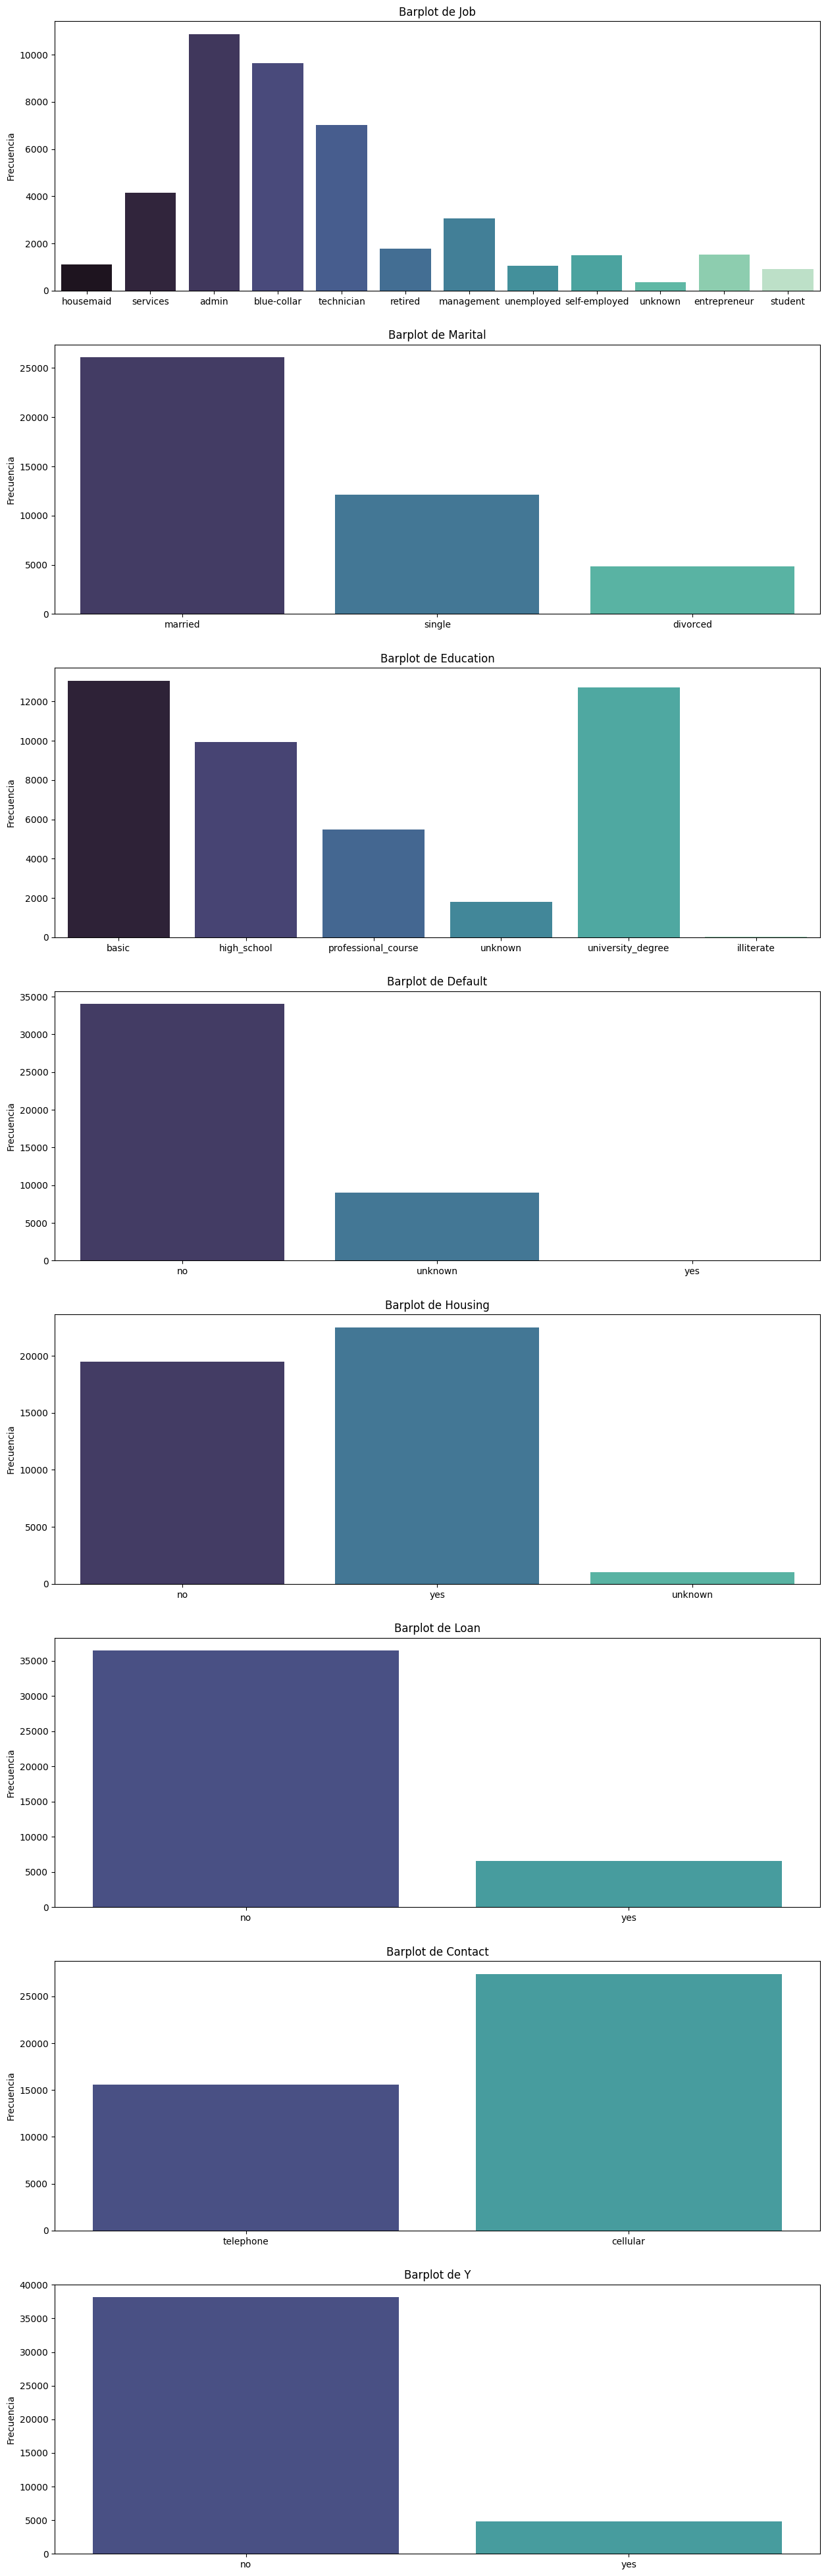

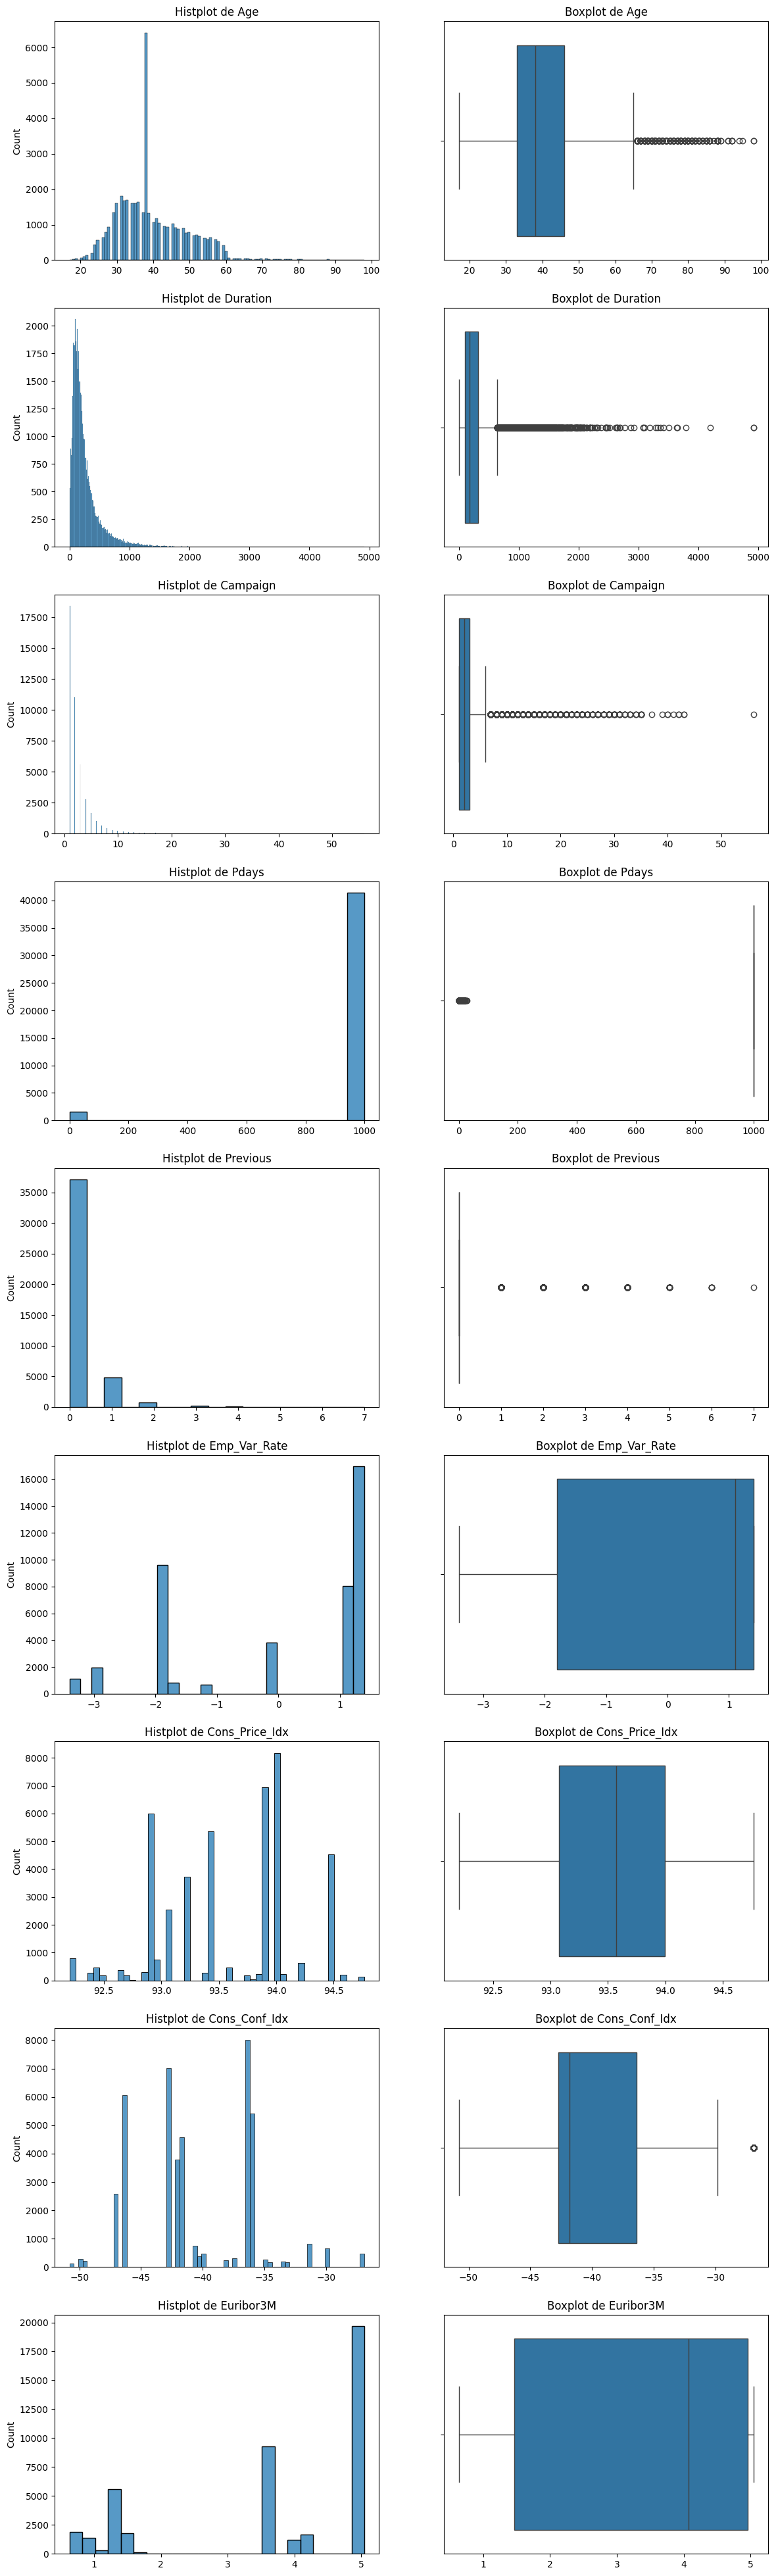

In [17]:
sa.visualizaciones(df_merged)

### 🔠 **Análisis de las variables categóricas:**

- **Job**:  las categorías más destadadas son **admin** (25.29%), **blue-collar** (22.45%) y **technician** (16.34%).
- **Marital**: la categoría **married** es la más destacada con un 60.66%.
- **Education**: las categorías más destacadas son **basic** (30.35%), **university_degree** (29.59%), **high_school** (23.08%) y **professional_course** (12.74%).
- **Default**: la categoría más destacada es **no** con un 79.11%.
- **Housing**: las categorías más destacadas son **yes** (52.32%) y **no** (45.29%).
- **Loan**: las categorías más destacadas son **no** (82.81%) y **yes** (15.19%).
- **Contact**: las categorías más destacadas son **cellular** (63.71%) y **telephone** (36.29%).
- **Y**: las categorías más destacadas son **no** (88.73%) y **yes** (11.27%).


### 🔢 **Análisis de las variables numéricas:**

- **Age**: las edades más comunes son entre 30 y 35 años, y la mediana se encuentra en 38 años. Tenemos outliers por arriba pero tienen sentido ya que corresponden con edades de clientes superiores a 65 años aproximadamente.
- **Duration**: y **Campaign**: formas muy parecidas. La distribución se centra en los valores bajos y hay bastantes outliers por arriba. 
    -  **Duration**: Tiene una correlación del 0.4 con **Y**, es decir, parece que la duración (en segundos) del último contacto con cliente y si contratan o no un producto o servicio están relacionados. Los valores más comunes se encuentran en el rango entre 70 y 110 segundos aproximadamente.
    - **Campaign**: los número de contacto más comunes son entre 1 y 3 veces.
- **Pdays**: el valor 999 con una aparición del 96.31% de las veces,nos sugiere que nunca antes se había contactado con cliente. Tiene una correlación con **Y** de -0.3.
- **Previous**: confirma el punto anterior. Antes de esta campaña, en el 86,29 % de las ocasiones nunca se había contactado anteriormente con cliente. Tiene una correlación con **Y** de 0.23.
- **Emp_Var_Rate** y **Euribor3M**: ambas tienen una forma muy parecida. Mirando la matriz de correlación, comprobamos que ambas están muy correlacionadas (0.97). Cuando el Euribor a tres meses sube, la tasa de variación de empleo sube, y viceversa. Además, ambas tienen una correlación de -0.3 y -0.31 respectivamente con **Y** por lo que cuando ambas suben, los clientes suscriben menos productos y viceversa, cuando ambas bajan, los clientes suscriben más productos.
- **Cons_Price_Idx**: tiene una alta correlación con **Euribor3M** (0.68).